# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Aluno**: Vinícius Brandão Crepschi

**RA/CPF**: 743601


## Importando dados

In [1]:
import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import scipy.stats as stats

# importa o arquivo e guarda em um dataframe do Pandas
train = pd.read_csv( 'train.csv', sep=',', index_col=None)
test = pd.read_csv( 'test.csv', sep=',', index_col=None)
set1 = pd.read_csv( 'set1.csv', sep=',', index_col=None)
set2 = pd.read_csv( 'set2.csv', sep=',', index_col=None)
set3 = pd.read_csv( 'set3.csv', sep=',', index_col=None)

---
## Análise exploratória

Nesta seção foram feitas análises sobre os conjuntos de dados fornecidos, observando os dados e colunas. Através de gráficos, foi possível observar o formato de cada conjunto de dados

Vamos primeiro observar as primeiras linhas de cada conjunto:

In [2]:
display(set1.head(5))
display(set2.head(5))
display(set3.head(5))

,Id,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D0040,D0041,D0042,D0043,D0044,D0045,D0046,D0047,D0048,D0049
0,0,1.0,1.400000,1.400000,9.000000,9.000000,8.384615,8.384615,13.0,13.0,...,6.565851e-09,12.0,20.0,0.00001,32.0,29.700000,9.9,105.6,75.0,3.121854e-08
1,1,0.0,0.723971,1.000000,9.000000,8.900000,34.294117,9.222222,17.0,9.0,...,3.488140e-09,10.0,29.0,0.00001,32.0,29.369999,402.6,105.6,4215.0,1.578266e-08
2,2,1.0,1.305677,1.305677,18.705883,18.705883,15.863636,15.863636,22.0,22.0,...,3.507373e-09,23.0,14.0,0.00001,32.0,61.729414,9.9,105.6,86.0,1.509851e-08
3,3,0.0,5.141328,9.170616,1.000000,2.595238,7.166667,3.886364,48.0,44.0,...,3.094160e-08,113.0,15.0,0.00001,32.0,8.564286,33.0,105.6,362.0,1.518693e-07
4,4,1.0,0.113582,0.113582,1137.434814,1137.434814,6.600000,6.600000,40.0,40.0,...,1.251197e-05,42.0,25.0,0.00001,32.0,3753.534888,26.4,105.6,79.0,1.153391e-07


,Id,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D0098,D0099,D0100,D0101,D0102,D0103,D0104,D0105,D0106,D0107
0,0,146.0,4,4.205479,0.095890,0.027402,1.953728,0.054795,0.089041,0.143836,...,0.00001,-15.34,0.030143,0.158219,0.105479,0.033458,0.000117,0.191781,0.002603,0.08
1,1,29.0,10,5.655172,0.379310,0.008225,1.429630,0.172414,0.275862,0.448276,...,0.00001,-15.34,0.009047,0.493103,0.120168,0.058667,0.000265,0.378151,0.005575,0.05
2,2,163.0,8,5.300613,0.104294,0.018947,1.919626,0.141104,0.184049,0.251534,...,0.00001,-15.34,0.020842,0.276687,0.114724,0.088000,0.002811,0.325153,0.004629,0.23
3,3,12.0,8,8.166667,0.416667,0.004304,1.392405,0.083333,0.166667,0.250000,...,0.00001,-15.34,0.004735,0.275000,0.000000,0.079364,0.013001,0.448276,0.006361,0.01
4,4,250.0,7,5.432000,0.108000,0.014578,2.458716,0.160000,0.252000,0.324000,...,0.00001,-15.34,0.016036,0.356400,0.118800,0.095988,0.001989,0.420000,0.003010,0.40


,Id,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D0138,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147
0,0,2.564949,2.564949,2.079442,2.079442,1.000000,1.000000,0.336472,0.336472,2.197225,...,0.024,0.040,0.00001,2.180207,0.850000,-16.015176,0.000000,0.447179,-14.656926,0.018882
1,1,2.833213,2.197225,2.197225,2.197225,0.333333,1.000000,-0.323004,0.000000,2.197225,...,0.020,0.058,0.00001,1.867641,0.850000,-16.552813,1.781575,1.377964,-16.016694,0.025232
2,2,3.091042,3.091042,2.833213,2.833213,0.941176,0.941176,0.266722,0.266722,2.928838,...,0.046,0.028,0.00001,2.627386,0.800000,-16.548139,0.344645,0.108658,-15.307439,-0.000148
3,3,3.871201,3.784190,0.000000,3.737670,0.000000,0.976190,1.637311,2.216004,0.000000,...,0.226,0.030,0.00001,3.216561,0.829762,-14.697490,0.303174,0.401714,-14.083293,0.005164
4,4,3.688879,3.688879,3.135494,3.135494,0.652174,0.652174,-2.175233,-2.175233,7.036531,...,0.084,0.050,0.00001,3.135548,0.554348,-9.595501,0.589175,0.100116,-13.572599,-0.000632


Em seguida iremos plotar boxplots com os 3 conjuntos e observar a dispersão dos dados e os valores discrepantes.

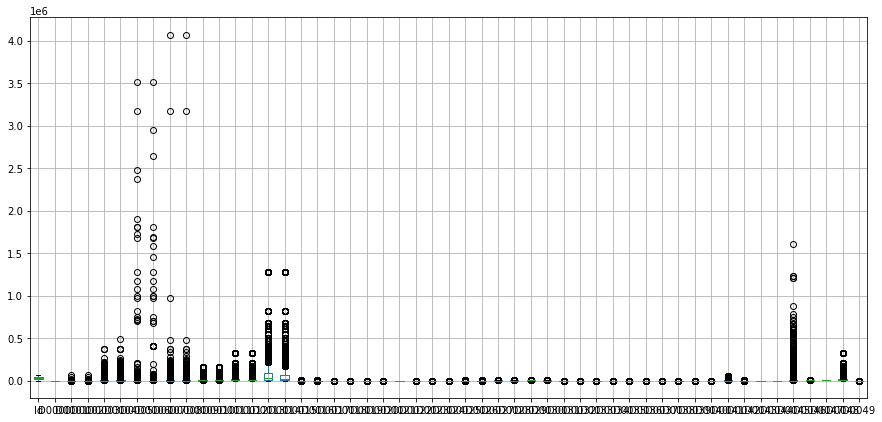

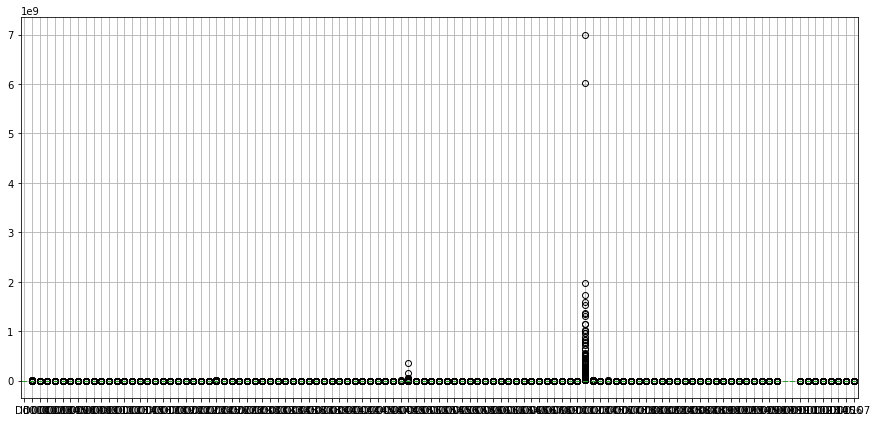

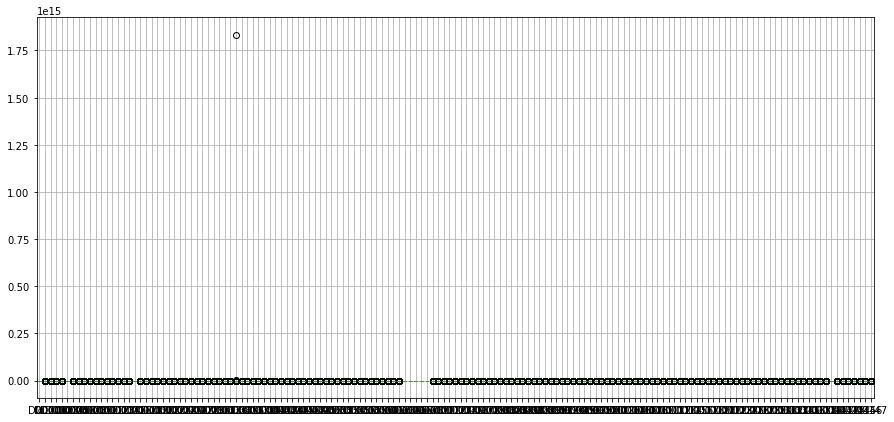

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# apresenta as principais estatísticas sobre a base de dados
set1.boxplot(figsize=(15,7))
plt.show()

set2.boxplot(figsize=(15,7))
plt.show()

set3.boxplot(figsize=(15,7))
plt.show()

Vamos observar agora os dados estatísicos dos conjuntos, tais como média, desvio padrão, quartis e valores máximos/mínimos, por coluna.

In [4]:
df_detalhes1 = set1.describe()
df_detalhes2 = set2.describe()
df_detalhes3 = set3.describe()

print(df_detalhes1)
print(df_detalhes2)
print(df_detalhes3)

                 Id         D0000         D0001         D0002          D0003  \
count  60842.000000  60778.000000  60790.000000  60790.000000   60842.000000   
mean   30420.500000      0.715555     19.369118     25.204437    1057.868353   
std    17563.716876      0.451153    364.379308    382.993687    6860.500808   
min        0.000000      0.000000      0.000012      0.000011       0.000000   
25%    15210.250000      0.000000      0.208333      0.311111       1.333333   
50%    30420.500000      1.000000      0.782123      1.095822      10.750000   
75%    45630.750000      1.000000      2.015743      3.254610      72.564934   
max    60841.000000      1.000000  63011.152000  63011.152000  372921.000000   

               D0004         D0005         D0006         D0007         D0008  \
count   60791.000000  6.079100e+04  6.077800e+04  6.079100e+04  6.079000e+04   
mean     1051.258571  5.990345e+02  5.632649e+02  1.037622e+03  1.165955e+03   
std      7288.342331  3.117805e+04  2.9

Vamos verificar a presença de valores NaN

In [5]:
print("Quandidade de NaN no conjunto 1:", set1.isnull().sum().sum())
print("Quandidade de NaN no conjunto 2:", set2.isnull().sum().sum())
print("Quandidade de NaN no conjunto 3:", set3.isnull().sum().sum())

Quandidade de NaN no conjunto 1: 2360
Quandidade de NaN no conjunto 2: 1848
Quandidade de NaN no conjunto 3: 1576


---
## Pré-processamento

Agora iremos usar as tabelas com os Id's de treinamento e construir nossos conjuntos que serão usados para o treinamento dos modelos. Para isso iremos remover a coluna Id e acrescentar a coluna Class com o valor do rótulo de cada amostra fornecida. Sendo -1 uma amostra legítima e 1 uma amostra que contém Phishing

In [6]:
from scripts.preprocessamento import build_train_set

X_train_1, test1 = build_train_set(set1, train, test)
X_train_2, test2 = build_train_set(set2, train, test)
X_train_3, test3 = build_train_set(set3, train, test)

display(X_train_1.head(5))
display(X_train_2.head(5))
display(X_train_3.head(5))

print('Dados importados com sucesso!')

,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0041,D0042,D0043,D0044,D0045,D0046,D0047,D0048,D0049,Class
11,1.0,206.797440,206.797440,30.230108,30.230108,2357.222200,2357.222200,12442.0,12442.0,15002.0,...,12390.0,19.0,0.00001,32.0,99.759356,986.7,105.6,46466.0,7.641052e-06,-1
23,0.0,32.407921,1802.836792,9026.972656,22854.500000,25.909044,11.126143,3892.0,39558.0,44460.0,...,42372.0,16.0,0.00001,32.0,75419.850000,5263.5,105.6,82278.0,1.756964e-05,-1
24,1.0,0.207524,0.207524,0.000000,0.000000,66.864410,66.864410,59.0,59.0,4842.0,...,1.0,17.0,0.00001,32.0,0.000000,349.8,105.6,6986.0,3.340921e-08,-1
30,1.0,1.579043,1.579043,13.076923,13.076923,23.323076,23.323076,65.0,65.0,794.0,...,71.0,18.0,0.00001,32.0,43.153847,273.9,105.6,2607.0,6.562869e-08,-1
31,0.0,198.054459,199.756836,436.399994,180.455887,11.460490,10.956733,4328.0,4322.0,5200.0,...,4325.0,24.0,0.00001,32.0,595.504427,132.0,105.6,5456.0,5.586842e-06,-1


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0099,D0100,D0101,D0102,D0103,D0104,D0105,D0106,D0107,Class
11,665.0,22,3.870677,2.562406,0.070125,2.756596,0.335338,0.457143,0.566917,0.631579,...,-15.34,0.077137,0.623609,2.818647,0.003615,6.125775,0.631579,0.002931,2.23,-1
23,193.0,7,6.186528,0.295337,0.010564,2.191153,0.108808,0.181347,0.259067,0.357513,...,-15.34,0.011621,0.284974,0.856114,0.126955,0.029652,0.145990,0.001422,0.21,-1
24,6.0,6,7.166667,0.000000,0.005854,1.020833,0.166667,0.166667,0.166667,0.500000,...,-15.34,0.006439,0.183333,0.000000,0.005500,0.000000,0.500000,0.000000,0.01,-1
30,358.0,8,4.600559,0.000000,0.025065,2.247758,0.058659,0.114525,0.237430,0.279330,...,-15.34,0.027571,0.261173,0.000000,0.147400,0.013749,0.279330,0.005732,0.21,-1
31,406.0,2,4.495074,0.032020,0.044284,2.278856,0.110837,0.137931,0.199507,0.251232,...,-15.34,0.048713,0.219458,0.000000,0.060267,0.027969,0.251870,0.002397,0.45,-1


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147,Class
11,9.428833,9.428833,4.394449,4.394449,1.000000,1.000000,5.331740,5.331740,3.408838,3.408838,...,0.038,0.00001,8.014508,0.850000,-8.437591,1.250224,0.159040,-10.007430,-0.005927,-1
23,8.266678,10.585523,3.555348,2.397895,0.166667,0.666667,3.478403,7.497117,9.107972,10.036903,...,0.032,0.00001,8.997695,0.566667,-10.425221,1.336634,2.070317,-10.015296,-0.104895,-1
24,4.077537,4.077537,-50.000000,-50.000000,1.000000,1.000000,-1.572510,-1.572510,-50.000000,-50.000000,...,0.034,0.00001,3.465907,0.850000,-15.591955,1.508709,3.746414,-14.668066,-0.029294,-1
30,4.174387,4.174387,2.484907,2.484907,1.000000,1.000000,0.456819,0.456819,2.570849,2.570849,...,0.036,0.00001,3.548229,0.850000,-15.384612,0.954553,2.127292,-14.023104,0.019396,-1
31,8.372861,8.371474,2.995732,4.204693,1.000000,1.000000,5.288542,5.297101,6.078559,5.195486,...,0.048,0.00001,7.115753,0.850000,-11.612473,1.097337,0.156020,-10.291912,0.015532,-1


Dados importados com sucesso!


Em seguida iremos tratar as amostras com atributos NaN, preenchendo-as com a média da coluna correspondente.

In [7]:
from scripts.analise_exploratoria import encontrar_nan

encontrar_nan(X_train_1)
encontrar_nan(X_train_2)
encontrar_nan(X_train_3)

encontrar_nan(test1)
encontrar_nan(test2)
encontrar_nan(test3)

,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0041,D0042,D0043,D0044,D0045,D0046,D0047,D0048,D0049,Class
373,1.0,0.053950,0.053950,233.333328,233.333328,27.400000,27.400000,5.0,5.0,1591.0,...,8.0,NaN,0.00001,32.0,769.999983,1310.1,105.6,2153.0,2.391579e-08,-1
448,1.0,1.605425,1.605425,10.090909,10.090909,16.933332,16.933332,30.0,30.0,174.0,...,14.0,28.0,0.00001,32.0,33.300000,805.2,105.6,2371.0,2.544415e-08,-1
770,1.0,8.168903,8.168903,0.000000,0.000000,21.431326,21.431326,415.0,415.0,3452.0,...,1.0,NaN,0.00001,32.0,0.000000,2118.6,105.6,21877.0,3.539367e-07,-1
931,1.0,635.853150,635.853150,18.651108,18.651108,1018.447400,1018.447400,23695.0,23695.0,158989.0,...,31774.0,23.0,0.00001,32.0,61.548656,8190.6,105.6,317980.0,NaN,-1
983,1.0,1.529870,1.529870,8.666667,8.666667,11.555555,11.555555,18.0,18.0,26.0,...,14.0,18.0,0.00001,32.0,28.600001,165.0,105.6,119.0,1.795637e-08,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57471,0.0,1.929483,0.010748,7691.646973,6908.736816,22.584587,17.923077,532.0,26.0,795.0,...,27.0,16.0,0.00001,32.0,22798.831494,8190.6,105.6,91240.0,8.674387e-07,-1
57700,0.0,0.062500,0.500000,0.000000,0.000000,14.000000,1.000000,1.0,1.0,3.0,...,5.0,22.0,0.00001,32.0,0.000000,3.3,105.6,11.0,2.792979e-09,-1
58078,1.0,0.104956,0.104956,0.000000,0.000000,44.166668,44.166668,6.0,6.0,97.0,...,1.0,17.0,0.00001,32.0,0.000000,716.1,105.6,4207.0,1.296921e-09,-1
59017,0.0,0.408163,0.571429,1.333333,0.000000,29.142857,8.000000,7.0,3.0,25.0,...,93.0,29.0,0.00001,32.0,0.000000,165.0,105.6,NaN,3.918157e-08,-1


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0099,D0100,D0101,D0102,D0103,D0104,D0105,D0106,D0107,Class
373,15.0,1,6.066667,0.000000,0.003615,1.204545,0.200000,0.200000,0.200000,0.266667,...,-15.34,0.003977,0.220000,0.000000,0.010313,0.000107,0.266667,0.025641,0.03,-1
931,418.0,13,4.758373,0.973684,0.056093,2.116974,0.078947,0.131579,0.255981,0.306220,...,-15.34,0.061702,0.281579,1.071053,0.005208,6.693991,0.306220,0.000532,0.33,-1
983,443.0,4,4.399549,0.067720,0.086676,2.168631,0.054176,0.099323,0.135440,0.212190,...,-15.34,0.095343,0.148984,0.074492,0.119821,0.002934,0.212190,0.000421,0.24,-1
1140,267.0,6,5.561798,0.194757,0.037032,2.115942,0.056180,0.112360,0.205993,0.265918,...,-15.34,0.040735,0.226592,0.214232,0.056407,0.000537,0.265918,NaN,0.15,-1
1246,1963.0,4,4.303617,0.341824,0.118267,2.408281,0.056037,0.079980,0.127866,0.187978,...,-15.34,0.130094,0.140652,0.025926,0.161700,0.011480,0.235690,0.005538,1.10,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57266,344.0,9,5.808140,0.000000,0.036134,2.643341,0.122093,0.177326,0.226744,0.279070,...,-15.34,0.039748,0.249419,0.000000,0.050555,0.000328,0.279070,0.000756,0.42,-1
57471,324.0,10,5.669753,0.012346,0.034701,2.308761,0.114198,0.169753,0.225309,0.354938,...,-15.34,0.038171,0.247840,0.064706,0.190259,0.011996,0.356209,0.002107,0.37,-1
57700,17.0,5,4.764706,0.000000,0.010794,1.272727,0.294118,0.411765,0.411765,0.411765,...,-15.34,0.011873,0.452941,0.000000,0.023100,0.000259,0.382353,0.013521,0.05,-1
58078,645.0,25,4.606202,0.000000,0.039973,3.559055,0.176744,0.210853,0.396899,0.440310,...,-15.34,0.043970,0.436589,0.000000,0.220000,0.000000,0.440310,0.000000,1.14,-1


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147,Class
373,1.609438,1.609438,1.609438,1.609438,0.833333,0.833333,-2.919699,-2.919699,5.452468,5.452468,...,0.044,0.00001,1.368022,0.708333,-12.902698,3.080690,4.898278,-14.910623,-0.017015,-1
931,10.073019,10.073019,3.637586,3.637586,0.947368,0.947368,6.454968,6.454968,2.925906,2.925906,...,0.046,0.00001,8.562066,0.805263,-8.367830,1.794025,1.618035,-9.354208,-0.113804,-1
983,2.890372,2.890372,2.397895,2.397895,1.000000,1.000000,0.425183,0.425183,2.159484,2.159484,...,0.036,0.00001,2.456816,0.850000,-16.372491,1.957197,0.312566,-15.139596,0.008411,-1
1246,2.302585,0.000000,1.945910,-50.000000,0.875000,1.000000,-0.261014,-1.252763,2.238047,-50.000000,...,0.052,0.00001,0.000000,0.850000,NaN,1.001857,1.591032,-15.248920,0.046126,-1
2006,4.094345,4.094345,2.708050,2.708050,0.937500,0.937500,0.407562,0.407562,3.890544,3.890544,...,0.064,0.00001,3.480193,0.796875,-14.379809,2.630600,2.140042,-14.519738,-0.009118,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57266,4.290459,4.290459,2.833213,2.833213,1.000000,1.000000,0.681755,0.681755,4.216234,4.216234,...,0.062,0.00001,3.646891,0.850000,-15.618386,4.079927,1.553492,-14.232811,0.016585,-1
57471,6.276643,3.258097,2.772589,2.890372,0.823529,0.736842,0.657252,-4.532994,8.947890,8.840542,...,0.032,0.00001,2.769382,0.626316,-12.492161,2.917517,0.341444,-12.361084,0.111105,-1
57700,0.000000,0.000000,-50.000000,-50.000000,1.000000,1.000000,-2.772589,-0.693147,-50.000000,-50.000000,...,0.044,0.00001,0.000000,0.850000,-17.324096,0.000000,0.933820,-18.770357,-0.798740,-1
58078,1.791759,1.791759,-50.000000,-50.000000,1.000000,1.000000,-2.254211,-2.254211,-50.000000,-50.000000,...,0.034,0.00001,1.522996,0.850000,-17.475042,1.481524,2.365509,-17.522353,-0.230001,-1


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0040,D0041,D0042,D0043,D0044,D0045,D0046,D0047,D0048,D0049
1826,NaN,0.155446,13.525098,40.000000,33.036495,290.00000,1239.11540,20.0,1096.0,1601.0,...,7.700106e-07,20.0,26.0,0.00001,32.0,109.020433,1676.4,105.6,15902.0,9.137592e-07
13322,0.0,0.250000,0.250000,20.500000,20.500000,0.00000,0.00000,2.0,2.0,5.0,...,1.073913e-09,2.0,26.0,0.00001,32.0,67.650000,26.4,105.6,15.0,1.654959e-08
14359,0.0,35.910550,7.932176,29.876005,29.327623,467.00000,383.73914,2113.0,467.0,5428.0,...,6.593020e-07,1854.0,14.0,0.00001,32.0,96.781156,4385.7,105.6,35461.0,1.718912e-06
16092,0.0,1.460716,12.264633,17.153847,11.266666,33.16883,5.75000,13.0,270.0,5311.0,...,3.713936e-07,276.0,19.0,0.00001,32.0,37.179998,1676.4,105.6,14592.0,4.027084e-07
17860,NaN,118.279460,118.279460,8.038052,8.038052,820.00000,820.00000,1971.0,1971.0,4124.0,...,5.619483e-08,2116.0,18.0,0.00001,32.0,26.525572,1092.3,105.6,11181.0,3.077670e-06
18460,1.0,45307.440000,45307.440000,38.283962,38.283962,992023.20000,992023.20000,3166794.0,3166794.0,158989.0,...,3.113460e-07,49951.0,17.0,0.00001,32.0,126.337075,2996.4,105.6,317980.0,6.160321e-05
22550,0.0,4.921881,88.808440,23.988201,13.141287,857.06665,1025.30000,339.0,2548.0,455.0,...,1.547220e-11,2549.0,24.0,0.00001,32.0,43.366247,168.3,105.6,931.0,4.677888e-06
25350,1.0,276.799680,276.799680,46.750687,46.750687,7311.51800,7311.51800,25534.0,25534.0,31174.0,...,1.096546e-10,25522.0,20.0,0.00001,32.0,154.277267,363.0,105.6,102208.0,1.599448e-05
37460,1.0,0.151515,0.151515,34.666668,34.666668,0.00000,0.00000,3.0,3.0,24.0,...,7.039151e-11,1.0,18.0,0.00001,32.0,114.400004,16.5,105.6,1641.0,1.797844e-08
40510,NaN,28.841534,28.841534,66.773640,66.773640,668.06120,668.06120,3786.0,3786.0,4564.0,...,1.624131e-08,3781.0,20.0,0.00001,32.0,220.353012,570.9,105.6,5563.0,1.337919e-06


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0098,D0099,D0100,D0101,D0102,D0103,D0104,D0105,D0106,D0107
1826,624.0,2,4.977564,0.003205,0.178896,2.453947,0.081731,0.110577,0.198718,0.246795,...,0.00001,-15.34,0.196786,0.218590,0.016541,0.006794,3.351731,0.365915,0.000730,0.51
13322,370.0,0,NaN,0.000000,0.635996,2.527436,0.018919,0.059459,0.118919,0.167568,...,0.00001,-15.34,0.699596,0.130811,0.000000,0.006708,6.912120,0.178478,0.000761,0.07
14359,6.0,2,4.666667,0.000000,0.193103,0.523077,0.000000,0.000000,NaN,0.666667,...,0.00001,-15.34,0.212413,NaN,0.097554,0.007890,6.479894,0.363914,0.000903,0.00
16092,364.0,5,4.909341,0.648352,0.121218,1.955455,0.046703,0.071429,0.098901,0.175824,...,0.00001,-15.34,0.133340,0.108791,0.410169,0.000802,6.201843,0.372881,0.000155,0.17
17860,270.0,1,4.674074,0.233333,0.130777,1.915000,0.125926,0.188889,0.281481,0.374074,...,0.00001,-15.34,0.143855,0.309630,0.256667,0.005734,5.462005,0.374074,0.000171,0.34
18460,632.0,16,5.393987,3.463608,0.058369,2.286927,0.175633,0.227848,0.325949,0.450949,...,0.00001,-15.34,0.064206,0.358544,3.809968,0.002882,6.759027,0.450949,0.000413,1.11
25350,814.0,2,4.562654,0.125307,0.091749,2.162369,0.061425,0.093366,0.137592,0.201474,...,0.00001,-15.34,0.100924,0.151351,0.137838,0.018581,7.094492,0.201474,0.000199,0.50
37460,14.0,3,5.071429,0.000000,0.127928,0.841584,0.071429,0.142857,0.142857,0.285714,...,0.00001,-15.34,0.140721,0.157143,0.000000,0.000000,2.733397,0.285714,0.000000,0.01
40510,766.0,10,5.075718,0.171018,0.078962,2.339869,0.174935,0.219321,0.345953,0.446475,...,0.00001,-15.34,0.086858,0.380548,0.188120,0.001372,6.916072,0.446475,0.000256,NaN
44583,373.0,3,5.538874,0.316354,0.091396,NaN,0.136729,0.198391,0.356568,0.442359,...,0.00001,-15.34,0.100535,0.392225,0.347989,0.009119,6.256035,0.442359,0.000404,0.51


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0138,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147
1826,2.995732,6.999422,0.000000,3.258097,0.000000,0.769231,-1.861458,2.604547,3.688879,3.497613,...,0.040,0.052,0.00001,5.949509,0.653846,-11.965332,2.701346,3.725254,-14.256172,0.044985
13322,0.693147,0.693147,0.000000,0.000000,1.000000,1.000000,-1.386294,-1.386294,3.020425,3.020425,...,0.004,0.052,0.00001,0.589175,0.850000,-17.554163,1.178350,0.778847,-15.186526,0.021449
14359,7.655864,6.146329,0.000000,3.135494,0.000000,0.956522,3.581031,2.070927,3.397056,3.378530,...,3.708,0.028,0.00001,5.224380,0.813043,-12.097272,1.794025,0.801943,-11.558361,0.017779
16092,2.564949,5.598422,4.343805,1.386294,0.025974,0.250000,0.378927,2.506720,2.842222,2.421848,...,0.552,0.038,0.00001,4.758659,0.212500,-12.585103,1.683851,5.110698,-12.930669,0.022126
17860,7.586296,7.586296,2.484907,2.484907,1.000000,1.000000,4.773050,4.773050,2.084187,2.084187,...,4.232,0.036,0.00001,6.448352,0.850000,-14.190275,3.563778,0.627540,-10.781047,0.002907
18460,14.968230,14.968230,3.931826,3.931826,0.745098,0.745098,10.721227,10.721227,3.645031,3.645031,...,99.902,0.034,0.00001,12.722996,0.633333,-12.735007,1.794025,-2.542894,-9.082182,-0.676777
25350,10.147766,10.147766,4.025352,4.025352,1.000000,1.000000,5.623294,5.623294,3.844829,3.844829,...,51.044,0.040,0.00001,8.625601,0.850000,-19.493633,1.654024,0.169637,-9.356404,0.012910
37460,1.098612,1.098612,0.000000,0.000000,1.000000,1.000000,-1.887070,-1.887070,3.545779,3.545779,...,0.002,0.036,0.00001,0.933820,0.850000,-19.870406,0.000000,1.767525,-15.136497,0.011593
44583,10.156151,10.156151,1.609438,1.609438,0.600000,0.600000,5.417233,5.417233,4.589612,4.589612,...,4.314,0.030,0.00001,8.632728,0.510000,-11.525896,1.794025,1.171814,-10.807233,-0.012072


In [8]:
from scripts.preprocessamento import trata_faltantes

X_train_1 = trata_faltantes( X_train_1 )
X_train_2 = trata_faltantes( X_train_2 )
X_train_3 = trata_faltantes( X_train_3 )

test1 = trata_faltantes(test1)
test2 = trata_faltantes(test2)
test3 = trata_faltantes(test3)

Rodando de novo a função encontrar_nan podemos observar que todos os valores NaN foram preenchidos.

In [9]:
encontrar_nan(X_train_2)
encontrar_nan(X_train_3)

encontrar_nan(test1)
encontrar_nan(test2)
encontrar_nan(test3)

,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0099,D0100,D0101,D0102,D0103,D0104,D0105,D0106,D0107,Class


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147,Class


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0040,D0041,D0042,D0043,D0044,D0045,D0046,D0047,D0048,D0049


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0098,D0099,D0100,D0101,D0102,D0103,D0104,D0105,D0106,D0107


,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,D0009,...,D0138,D0139,D0140,D0141,D0142,D0143,D0144,D0145,D0146,D0147


Agora iremos observar os dados estatísticos, por coluna, de nossos conjuntos de treinamento, tais como a média, desvio padrão, valores máximos e mínimos e os quartis.

In [10]:
df_detalhes1 = X_train_1.describe()
df_detalhes2 = X_train_1.describe()
df_detalhes3 = X_train_1.describe()

print(df_detalhes1)
print(df_detalhes2)
print(df_detalhes3)


             D0000         D0001         D0002          D0003          D0004  \
count  4310.000000   4310.000000   4310.000000    4310.000000    4310.000000   
mean      0.691860     39.046216     49.406697     982.208742    1011.746483   
std       0.461242    971.640443    983.567696    6080.595306    9378.956370   
min       0.000000      0.000023      0.000105       0.000000       0.000000   
25%       0.000000      0.269383      0.410256       2.250000       2.000000   
50%       1.000000      0.910714      1.200141      14.725000      12.735961   
75%       1.000000      2.655571      4.566503      70.021214      65.806315   
max       1.000000  63011.152000  63011.152000  265286.000000  487709.000000   

              D0005         D0006         D0007         D0008          D0009  \
count  4.310000e+03  4.310000e+03  4.310000e+03  4.310000e+03    4310.000000   
mean   7.622253e+02  7.930613e+02  2.232273e+03  2.437506e+03    5398.341242   
std    2.765786e+04  2.833221e+04  6.22

### Normalização

Para que possamos trabalhar melhor com os dados, iremos realizar o processo de normalização, para que todos os dados estejam em dimensões próximas, mantendo sua proporção.

In [11]:
from scripts.preprocessamento import normalizar

X_norm1 = normalizar(X_train_1)
X_norm2 = normalizar(X_train_2)
X_norm3 = normalizar(X_train_3)
test1_norm = normalizar(test1)
test2_norm = normalizar(test2)
test3_norm = normalizar(test3)

In [12]:
# apresenta as principais estatísticas sobre a base de dados
df_detalhes1 = X_train_1.describe()
df_detalhes2 = X_train_2.describe()
df_detalhes3 = X_train_2.describe()

print(df_detalhes1)
print(df_detalhes2)
print(df_detalhes3)
print(test1.describe())

             D0000         D0001         D0002        D0003        D0004  \
count  4310.000000  4.310000e+03  4.310000e+03  4310.000000  4310.000000   
mean      0.000414  7.737878e-04  1.326813e-03     0.015388     0.012966   
std       0.001505  2.543219e-03  6.097596e-03     0.060444     0.039927   
min       0.000000  2.675656e-10  2.026659e-10     0.000000     0.000000   
25%       0.000000  5.638546e-06  7.770713e-06     0.000052     0.000038   
50%       0.000006  3.075947e-05  4.779542e-05     0.000441     0.000383   
75%       0.000053  2.290580e-04  3.826025e-04     0.005334     0.004611   
max       0.009006  4.630799e-02  1.677758e-01     0.999998     0.290007   

             D0005        D0006        D0007        D0008        D0009  ...  \
count  4310.000000  4310.000000  4310.000000  4310.000000  4310.000000  ...   
mean      0.009518     0.007893     0.012193     0.015519     0.033556  ...   
std       0.038715     0.035927     0.036383     0.043588     0.062539  ...   

### Análise de Componentes Principais (PCA)
Agora vamos realizar um PCA para reduzir a dimensionalidade dos conjuntos para apenas duas dimensões, de forma que possamos visualizar a distribuição dos dados em um plano bi-dimensional.

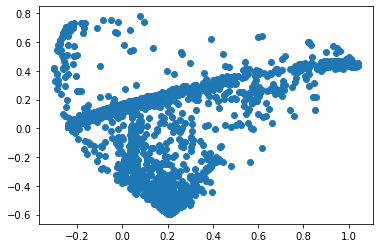

In [13]:
from scripts.analise_exploratoria import plot_pca

plot_pca(X_train_1)

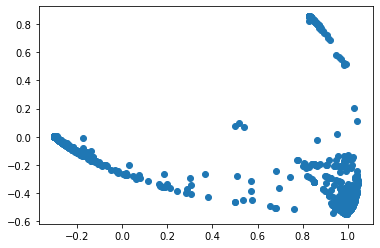

In [14]:
plot_pca(X_train_2)

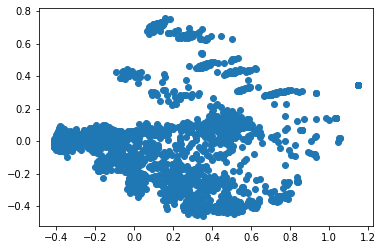

In [15]:
plot_pca(X_train_3)

### Balanceamento das Classes
Em seguida, iremos verificar qual a proporção entre as classes. Por se tratar de um problema no domínio das fraudes na internet, provavelmente descobriremos que o conjunto é desbalanceado, pois sabemos, que os casos de fraude são minoria dentre todos os tipos de blogs disponíveis na base.

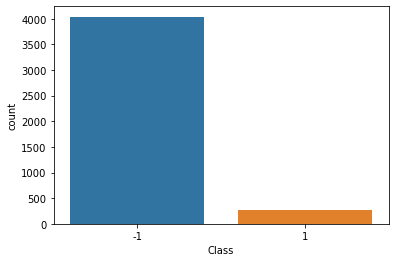

-1    4038
 1     272
Name: Class, dtype: int64

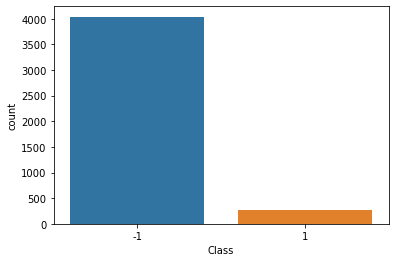

-1    4038
 1     272
Name: Class, dtype: int64

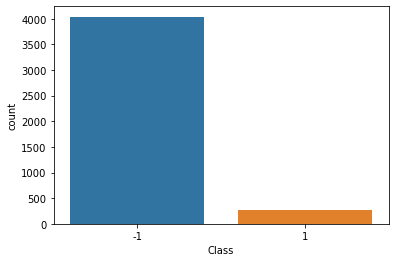

-1    4038
 1     272
Name: Class, dtype: int64

In [16]:
from scripts.analise_exploratoria import plot_distribuicao

plot_distribuicao(X_train_1)
plot_distribuicao(X_train_2)
plot_distribuicao(X_train_3)

Como podemos ver, a classe 1, correspondente aos casos de Phishing, representam 6,31% da base de dados, o que configura um conjunto de dados desbalanceado, de forma que os modelos darão preferência a classe majoritária. Isso poderá ser corrigido mais a frente com técnicas de Upsampling ou utilizando peso maior para a classe minoritária.

### Feature Selection

Iremos aplicar um algoritmo para classificar a importância de cada atributo e então eliminar atributos desnecessários.

In [17]:
from scripts.preprocessamento import feature_selection

X_train_1, test1 = feature_selection(X_train_1, test1)
X_train_2, test2 = feature_selection(X_train_2, test2)
X_train_3, test3 = feature_selection(X_train_3, test3)

[17 18 31 32 33 34 35 36 37 38 43 49]
[]
[140]


### Detecção de Outliers

Através de um boxplot, iremos observar a presença de outliers. No entanto com a base é desbalanceada e temos poucas amostras correspondentes ao caso de Phishing, optamos por não remover estes outliers pois a existência deles pode corresponder a algum padrão para a detecção de Phishing.

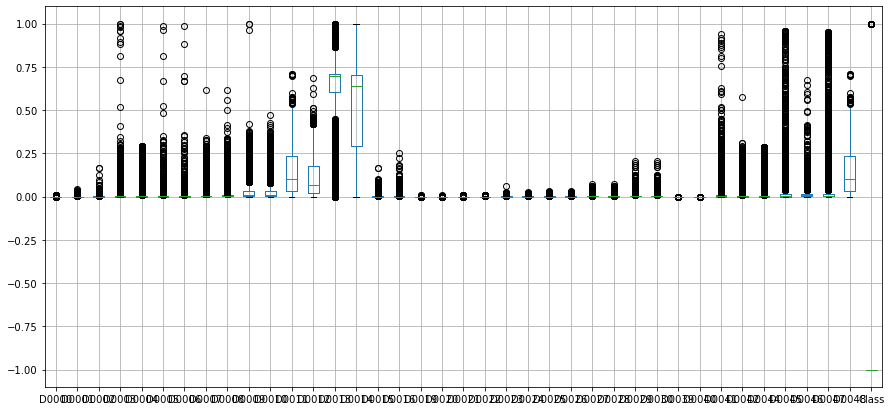

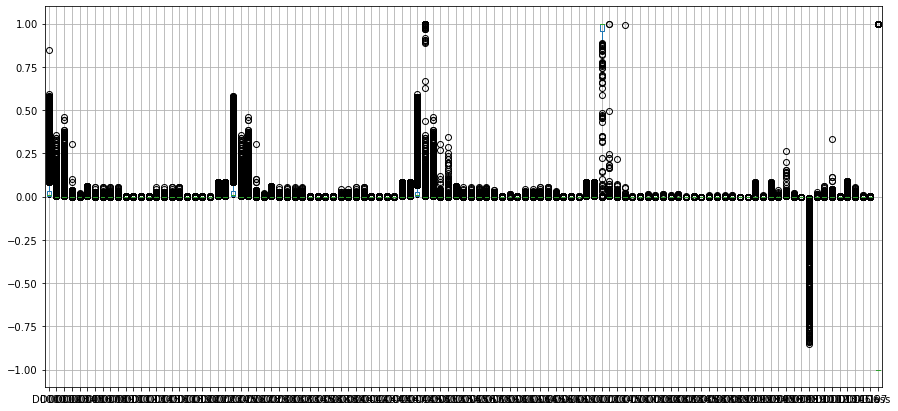

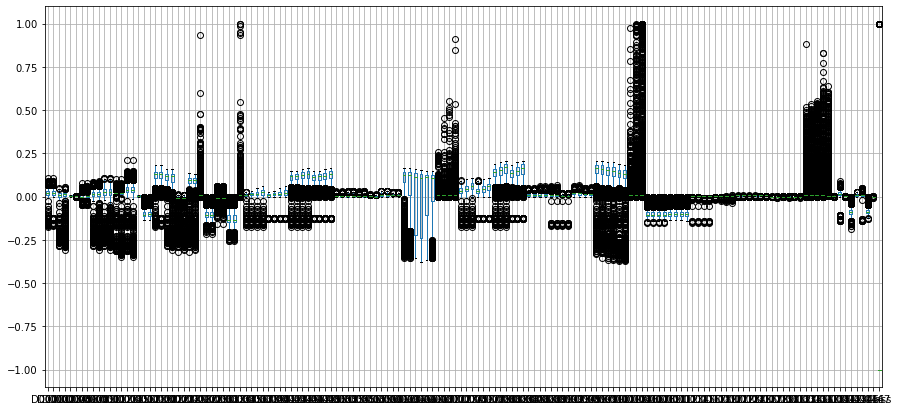

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# apresenta as principais estatísticas sobre a base de dados
X_train_1.boxplot(figsize=(15,7))
plt.show()

X_train_2.boxplot(figsize=(15,7))
plt.show()

X_train_3.boxplot(figsize=(15,7))
plt.show()

---
## Experimento

Nesta seção, iremos treinar os principais modelos utilizando a busca em grade para encontrar os melhores parâmetros para cada conjunto de dados. Será realizado o Upsampling para gerar novas amostras artificiais da classe minoritária de forma a melhorar o desempenho dos classificadores. Após o treinamento será instanciado um novo classificador usando os melhores parâmetros para gerar o arquivo de submissão.

### KNN
Para o KNN, foi feita a busca em grade pelo melhor valor de K, utilizando os seguintes valores: [3, 5, 7, 14, 28]

In [19]:
from scripts.experimentos import train_knn

knn1, X_test_knn1, Y_pred_knn1, Y_test_knn1 = train_knn(X_train_1)
knn2, X_test_knn2, Y_pred_knn2, Y_test_knn2 = train_knn(X_train_2)
knn3, X_test_knn3, Y_pred_knn3, Y_test_knn3 = train_knn(X_train_3)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.8s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.7s finished


In [20]:
print(knn1.best_params_)
print(knn2.best_params_)
print(knn3.best_params_)

{'n_neighbors': 28, 'weights': 'distance'}
{'n_neighbors': 28, 'weights': 'distance'}
{'n_neighbors': 28, 'weights': 'distance'}


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from scripts.experimentos import upsample

X = X_train_2.iloc[:, 0:-1].values
Y = X_train_2.iloc[:, -1].values

X_train, Y_train = upsample(X,Y)

knn_grid = KNeighborsClassifier(**knn2.best_params_)

knn_grid.fit(X_train, Y_train)

Y_res = knn_grid.predict_proba(test2)

result = test.copy()
result['Predicted'] = Y_res[:,1]

gfg_csv_data = result.to_csv('submission-knn-grid-2.csv', index = False) 

## Regressão Logística
Para a regressão logística, foram usados os seguintes parâmetros para a busca em grade: 'C': [500, 1000, 3000, 5000], 'penalty':['l1','l2'], além de setar também o atributo class_weight como balanced, para que o algoritmo atribua pesos de acordo com a distribuição das classes.

In [22]:
from scripts.experimentos import train_log_reg

logreg1, X_test_lr1, Y_pred_lr1, Y_test_lr1 = train_log_reg(X_train_1)
logreg2, X_test_lr2, Y_pred_lr2, Y_test_lr2 = train_log_reg(X_train_2)
logreg3, X_test_lr3, Y_pred_lr3, Y_test_lr3 = train_log_reg(X_train_3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s finished


In [23]:
print(logreg1.best_params_)
print(logreg2.best_params_)
print(logreg3.best_params_)

{'C': 5000, 'class_weight': 'balanced', 'penalty': 'l2'}
{'C': 5000, 'class_weight': 'balanced', 'penalty': 'l2'}
{'C': 5000, 'class_weight': 'balanced', 'penalty': 'l2'}


In [24]:
from sklearn.linear_model import LogisticRegression
from scripts.experimentos import upsample

X = X_train_3.iloc[:, 0:-1].values
Y = X_train_3.iloc[:, -1].values

X_train, Y_train = upsample(X,Y)

logreg = LogisticRegression(**logreg3.best_params_, max_iter=5000, verbose=1)

logreg.fit(X_train, Y_train)

Y_res = logreg.predict_proba(test3)

result = test.copy()
result['Predicted'] = Y_res[:,1]

gfg_csv_data = result.to_csv('submission-reg-grid-3.csv', index = False) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s finished


## Naive Bayes
Para o Naive Bayes não haviam parâmetros para buscar em grade. Por conta disso, os modelos foram apenas treinados aqui

In [25]:
from scripts.experimentos import train_nb

nb1, X_test_nb1, Y_pred_nb1, Y_test_nb1 = train_nb(X_train_1)
nb2, X_test_nb2, Y_pred_nb2, Y_test_nb2 = train_nb(X_train_2)
nb3, X_test_nb3, Y_pred_nb3, Y_test_nb3 = train_nb(X_train_3)

In [26]:
from sklearn.naive_bayes import GaussianNB
from scripts.experimentos import upsample

X = X_train_3.iloc[:, 0:-1].values
Y = X_train_3.iloc[:, -1].values

X_train, Y_train = upsample(X,Y)

naive = GaussianNB()

naive.fit(X_train, Y_train)

Y_res = naive.predict_proba(test3)

result = test.copy()
result['Predicted'] = Y_res[:,1]

gfg_csv_data = result.to_csv('submission-nb-grid-3.csv', index = False) 

## SVM Linear
Para o SVM Linear foram usados os seguintes parâmetros para a busca em grade: 'C': [0.001, 0.5, 1.0, 10.0, 100, 1000], além de configurar o atributo class_weight como balanced também para garantir pesos corretos para as classes de acordo com sua distribuição.

In [27]:
from scripts.experimentos import train_svm

supportv1, X_test_sv1, Y_pred_sv1, Y_test_sv1 = train_svm(X_train_2)
supportv2, X_test_sv2, Y_pred_sv2, Y_test_sv2 = train_svm(X_train_2)
supportv3, X_test_sv3, Y_pred_sv3, Y_test_sv3 = train_svm(X_train_3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


In [28]:
print(supportv1.best_params_)
print(supportv2.best_params_)
print(supportv3.best_params_)

{'C': 1000, 'class_weight': 'balanced', 'kernel': 'linear'}
{'C': 1000, 'class_weight': 'balanced', 'kernel': 'linear'}
{'C': 1000, 'class_weight': 'balanced', 'kernel': 'linear'}


In [29]:
from sklearn import svm 
from scripts.experimentos import upsample

X = X_train_2.iloc[:, 0:-1].values
Y = X_train_2.iloc[:, -1].values

X_train, Y_train = upsample(X,Y)

svm_novo = svm.SVC(**supportv2.best_params_, verbose=1, probability=True) 

svm_novo.fit(X_train, Y_train)

Y_res = svm_novo.predict_proba(test2)

result = test.copy()
result['Predicted'] = Y_res[:,1]

gfg_csv_data = result.to_csv('submission-svm-grid-2.csv', index = False) 

[LibSVM]

## Rede Neural Artificial
Para a Rede Neural Artificial foram usados os seguintes parâmetros para a busca em grade:Alfa de Regularização - [0.1, 0.01, 0.001] e Tamanho da camada oculta (nós) - input/3, input/2 e input. Ou seja, um terço do tamanho da entrada, metade do tamanho da entrada ou o tamanho inteiro da entrada.

In [30]:
from scripts.experimentos import train_mlp

neural1, X_test_mlp1, Y_pred_mlp1, Y_test_mlp1 = train_mlp(X_train_1)
neural2, X_test_mlp2, Y_pred_mlp2, Y_test_mlp2 = train_mlp(X_train_2)
neural3, X_test_mlp3, Y_pred_mlp3, Y_test_mlp3 = train_mlp(X_train_3)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished
C:\Users\PICHAU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.1min finished
C:\Users\PICHAU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.7min finished
C:\Users\PICHAU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [31]:
print(neural1.best_params_)
print(neural2.best_params_)
print(neural3.best_params_)

{'alpha': 0.1, 'hidden_layer_sizes': 39, 'max_iter': 2000, 'solver': 'lbfgs'}
{'alpha': 0.01, 'hidden_layer_sizes': 109, 'max_iter': 2000, 'solver': 'lbfgs'}
{'alpha': 0.01, 'hidden_layer_sizes': 148, 'max_iter': 2000, 'solver': 'lbfgs'}


In [32]:
from sklearn.neural_network import MLPClassifier
from scripts.experimentos import upsample

X = X_train_2.iloc[:, 0:-1].values
Y = X_train_2.iloc[:, -1].values

X_train, Y_train = upsample(X,Y)

neural_net = MLPClassifier(**neural2.best_params_)

neural_net.fit(X_train, Y_train)

Y_kag = neural_net.predict_proba(test2)

result = test.copy()
result['Predicted'] = Y_kag[:,1]

gfg_csv_data = result.to_csv('submission-neural-2-true.csv', index = False) 

C:\Users\PICHAU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


---
## Análise dos Resultados

Nesta seção, os resultados devem ser exibidos e comparados, através de tabelas e gráficos. Primeiro iremos exibir as curvas ROC e as métricas para cada modelo e o conjunto que obteve melhor desempenho e, em seguida a curva de aprendizado e escalabilidade.

### KNN 
O classificador KNN obteve melhores resultados com o conjunto 2

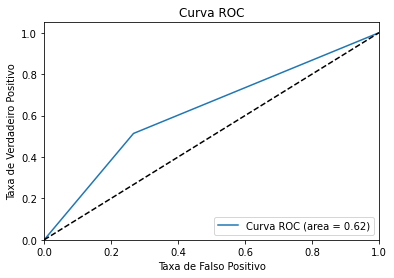

              precision    recall  f1-score   support

          -1       0.97      0.73      0.84       825
           1       0.08      0.51      0.14        37

    accuracy                           0.72       862
   macro avg       0.53      0.62      0.49       862
weighted avg       0.93      0.72      0.81       862



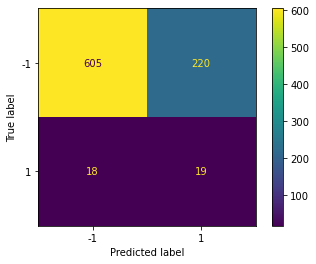

In [21]:
from scripts.analise_resultados import plot_roc_auc, plot_conf_matrix

plot_roc_auc(Y_test_knn2, Y_pred_knn2)
plot_conf_matrix(knn2, X_test_knn2, Y_test_knn2, Y_pred_knn2)

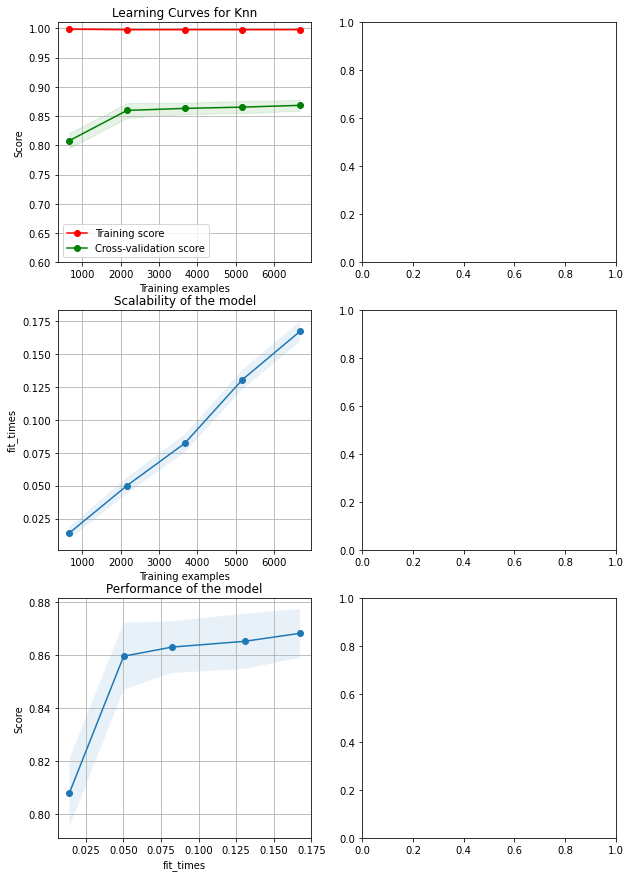

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from scripts.analise_resultados import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
from scripts.experimentos import upsample

X = X_train_2.iloc[:, 0:-1].values
Y = X_train_2.iloc[:, -1].values

X_train, Y_train = upsample(X,Y)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves for Knn"

cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(**knn2.best_params_)
plot_learning_curve(estimator, title, X_train, Y_train, axes=axes[:,0], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

### Regressão Logística 
O classificador Regressão Logística obteve melhores resultados com o conjunto 3 e obteve uma boa taxa de Phishing detectado, evidenciado pelo alto valor de recall 

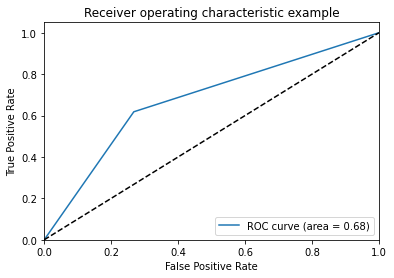

              precision    recall  f1-score   support

          -1       0.97      0.73      0.83       807
           1       0.14      0.62      0.22        55

    accuracy                           0.73       862
   macro avg       0.55      0.68      0.53       862
weighted avg       0.91      0.73      0.79       862



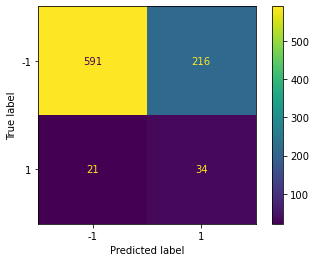

In [35]:
plot_roc_auc(Y_test_lr3, Y_pred_lr3)
plot_conf_matrix(logreg3, X_test_lr3, Y_test_lr3, Y_pred_lr3)

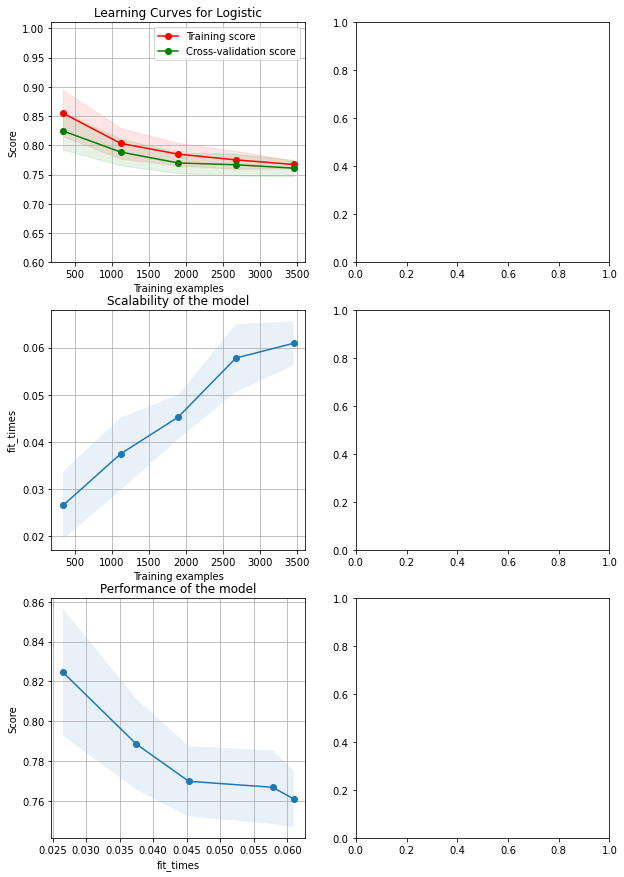

In [36]:
from sklearn.linear_model import LogisticRegression

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves for Logistic"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = LogisticRegression(**logreg3.best_params_)
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 0], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

### Naive Bayes 
O classificador Naive Bayes obteve melhores resultados com o conjunto 3, porém nenhum resultado com este classificador foi muito satisfatorio, uma vez que não foi capaz de detectar com eficiência os casos de Phishing

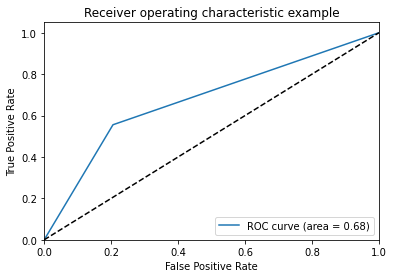

              precision    recall  f1-score   support

          -1       0.96      0.79      0.87       808
           1       0.15      0.56      0.24        54

    accuracy                           0.78       862
   macro avg       0.56      0.68      0.56       862
weighted avg       0.91      0.78      0.83       862



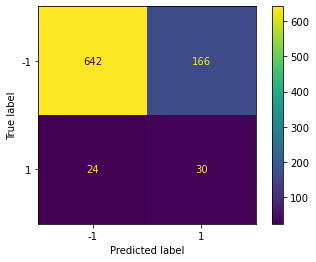

In [37]:
plot_roc_auc(Y_test_nb3, Y_pred_nb3)
plot_conf_matrix(nb3, X_test_nb3, Y_test_nb3, Y_pred_nb3)

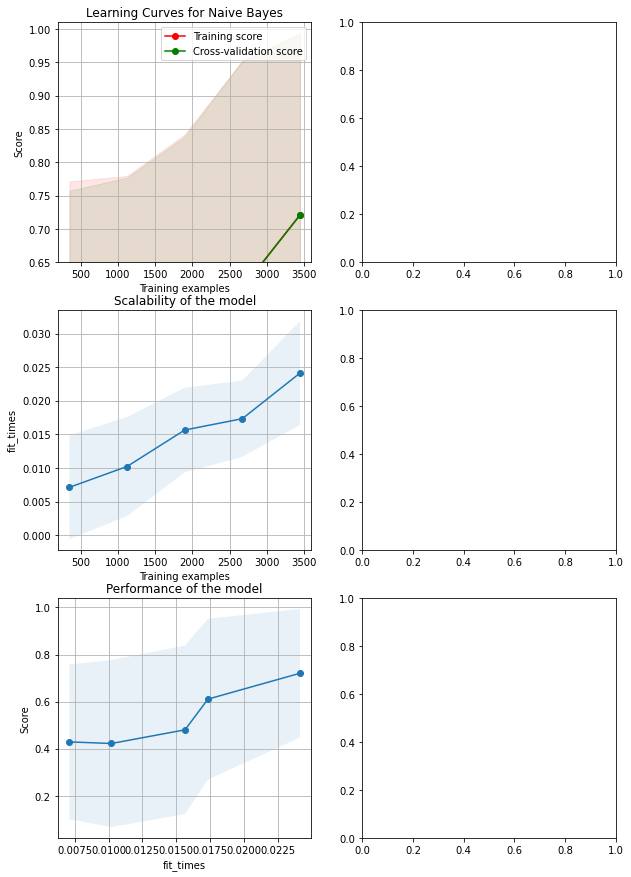

In [38]:
from sklearn.naive_bayes import GaussianNB

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves for Naive Bayes"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 0], ylim=(0.65, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

### SVM Linear 
O classificador SVM Linear obteve melhores resultados com o conjunto 2

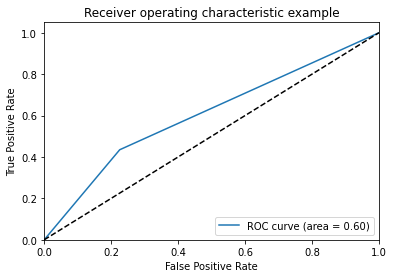

              precision    recall  f1-score   support

          -1       0.96      0.77      0.86       816
           1       0.10      0.43      0.16        46

    accuracy                           0.76       862
   macro avg       0.53      0.60      0.51       862
weighted avg       0.91      0.76      0.82       862



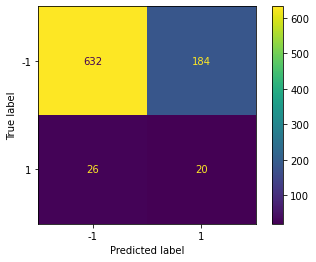

In [39]:
plot_roc_auc(Y_test_sv2, Y_pred_sv2)
plot_conf_matrix(supportv2, X_test_sv2, Y_test_sv2, Y_pred_sv2)

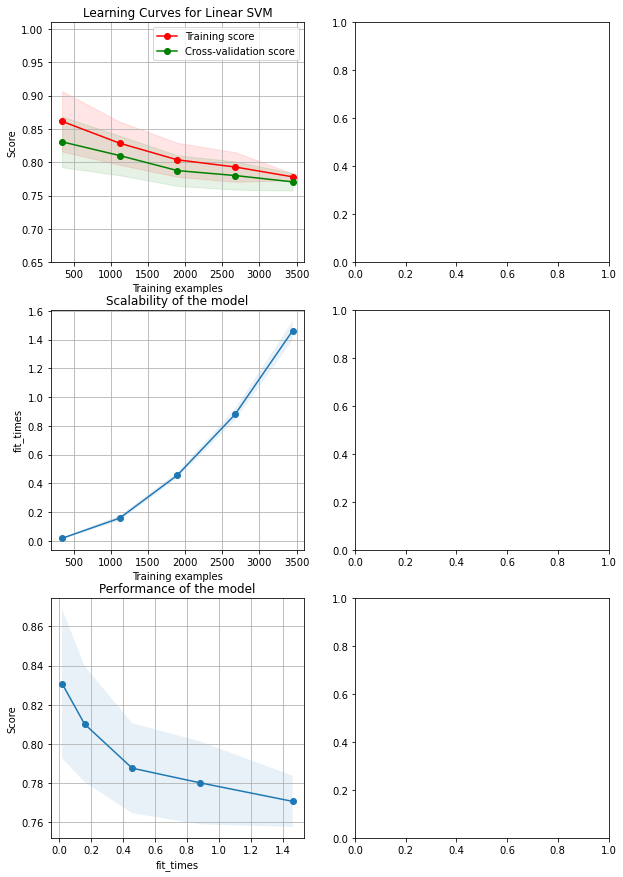

In [40]:
from sklearn import svm 

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves for Linear SVM"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = svm.SVC(**supportv3.best_params_)
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 0], ylim=(0.65, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

### Rede Neural 
O classificador Rede Neural artificial obteve melhores resultados com o conjunto 2

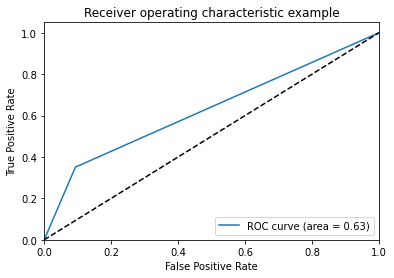

              precision    recall  f1-score   support

          -1       0.95      0.91      0.93       805
           1       0.21      0.35      0.26        57

    accuracy                           0.87       862
   macro avg       0.58      0.63      0.60       862
weighted avg       0.90      0.87      0.88       862



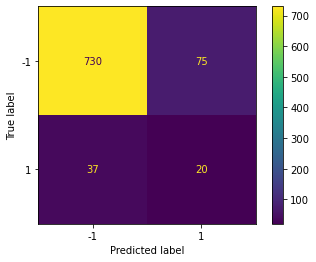

In [41]:
plot_roc_auc(Y_test_mlp2, Y_pred_mlp2)
plot_conf_matrix(neural2, X_test_mlp2, Y_test_mlp2, Y_pred_mlp2)

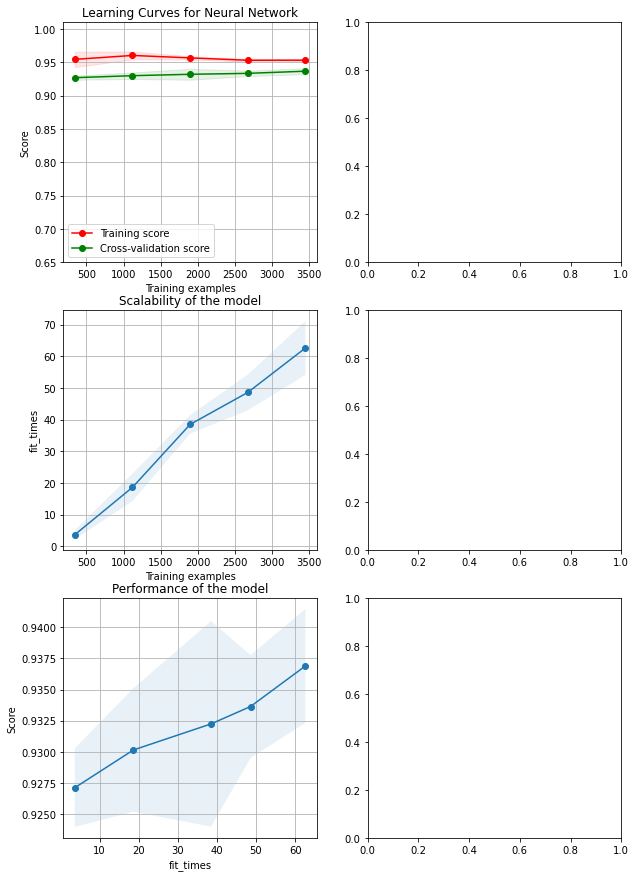

In [42]:
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves for Neural Network"

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = MLPClassifier(**neural2.best_params_)
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 0], ylim=(0.65, 1.01),
                    cv=cv, n_jobs=4)

plt.show()